# MOVIE RECOMMENDATION SYSTEM.

![Alt text](<Images/image-3.jpg>)

***

#**Author: Brian Kipruto Ngeny.**

**Student pace: Full time.**

**Scheduled Project review date/time: 17-09-2023, 23:59:59.**

**Instructor's name: Mark Tiba.**

**Blog post URL:**

***

## Table of contents

* [Introduction](#Introduction)

* [Business Understanding](#business-understanding)

* [Problem Statement](#problem-statement)

* [Objectives](#objectives)

* [Data Understanding](#data-understanding)

* [Importing Libraries](#Importing-Libraries)

* [Reading The Datasets](#Reading-The-Datasets)

* [Data Cleaning](#data-Cleaning)

* [Exploratory Data Analysis](#Exploratory-Data-Analysis)

* [Modeling](#Modeling)

    * [Model 1](#Model-1)

    * [Model 2](#Model-2)

* [Conclusions](#Conclusions)

* [Recommendation](#recommendations)

***


> ### __Introduction.__
The movie industry has grown to be a multi-billion industry within the last century and with the advent of technology, It is expected to accelerate in growth. To date, there have been thousands of movies produced and released, meaning that there are so many options to choose from in terms of the genres, release periods and even just personal prefrences.

 This project is aimed at developing a movie recommendation system that will provide recommendations of movies specific to users based on their rating of other movies. This should help in eradicating the hurdle of choosing and deciding on their own what to watch from the numerous amounts of movies on offer today. 

> ### __Business understanding__.
The dataset was provided by GroupLens which is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The dataset provides information necessary for developing and training a recommendation system that will be used for recommending movies to users based on their rating of other movies.

This project's target audiences are, streaming sites and movie enthusiasts who will nolonger have to worry about what to watch next because the resulting system will be able to recommend movies they might be interested in watching based on their rating of other movies. Streaming sites will also be able to attract more clients because of their competetive edge in being able to predict what a client might be interested in watching and recommending it to them.

> ### __Problem statement.__
With so many movies being released, the challenge now is to select what to watch. These has prompted me to come up with a solution in the form of a recommendation system for movies. By so doing, I hope to solve the problem faced by movie enthusiasts and online streaming companies by developing a system that recommends movies based on the rating given to other movies by users.   

> ### __Objectives.__
These primary objective of these project is to come up with a system that will be able to recommend movies to a user based on the ratings they have given to other movies. I shall explore the data provided and format it approprietly so as to come up with a functioning system that can recommend five movies that a user is likely to be interested in.

The secondary objective is to build a model that uses content based recommendation to recommend movies to a user that are simillar to a particular movie within the dataset. These is a tentative solution for the cold-start problem whwereby a user has not rated anymovies yet but has an idea of the type of movies they are interested in. 

> ### __Data Understanding.__
This datasets contained in the ml-latest-small folder describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. The folder contains `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`.

> __Ratings.csv__<br>
These data file contains all the ratings of all the movies and has the following format;<br>
___userId,movieId,rating,timestamp___<br>

> __tags.csv__<br>
These data file contains all the tags applied to each movie by a user and has the following format;<br> 
___userId,movieId,tag,timestamp___<br> 
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by the user.<br>

> __movies.csv__<br>
These data file contains all the information about the movies and has the following format;<br> 
___movieId,title,genres___<br>

> __links.csv__<br>
These dtata file contains all the identifiers that can be used to link to other sources of movie data. It has the following format;<br> 
___movieId,imdbId,tmdbId___

* ___userId:___ These refers to the unique identifiers for each of the users who was chosen to participate and is consistent throughout the datasets.<br>
* ___movieId:___ These refers to the unique identifiers for each of the movies and is consistent throughout the datasets.<br>
* ___rating:___ These refers to the rating a user gives a movie on a scale of 0 to 5.<br>
* ___timestamp:___ These represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.<br>
* ___title:___ These refers to the movie title and includes the year of release in parentheses.<br>
* ___genre:___ These represents the theme of the movie.<br>

****************************************************************************************************************************

### __Importing Libraries__.   
In this section, we begin by importing the necessary Python libraries and modules. These tools provide essential functions and capabilities that we will utilize throughout the project.

In [54]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

### __Reading the Data__
Here, we read and load the individual datasets and view the information pertaining to the datasets. This step is essential for preparing the data and making it accessible for further processing.

In [2]:
# read and preview movies data
movie_data = pd.read_csv('ml-latest-small/movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
# read and preview ratings data
rating_data = pd.read_csv('ml-latest-small/ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# read and preview tags data
tags_data = pd.read_csv('ml-latest-small/tags.csv')
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [8]:
# read and preview links data
links_data = pd.read_csv('ml-latest-small/links.csv')
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


***

### Data cleaning

Now that we have the datasets, the next step is to clean the data acquired by digging deeper into each of the datasets so as to;

> I) Drop the columns we won't need.<br>
> II) Identify any missing values and drop the rows.<br>
> III) Engineer features or new columns where necessary.<br>
> IV) Merge datasets if necessary.

> a) __movie_data__

In [10]:
# drop the null columns
movie_data = movie_data.dropna()
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


> b) __rating_data__

In [11]:
# drop the timestamp column
rating_data = rating_data.drop(['timestamp'], axis=1)
rating_data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


> __Merging datasets.__<br>
We are going to merge the ___movie_data___ dataframe and the ___rating_data___ dataframe into one dataframe called ___merged_df___.

In [12]:
# merge the ratings and movies datasets
merged_df = movie_data.merge(rating_data, on='movieId')
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [13]:
# drop null rows
merged_df = merged_df.dropna()
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [14]:
# drop duplicate records
merged_df = merged_df.drop_duplicates()
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [15]:
# Save cleaned dataset as CSV
merged_df.to_csv('ml-latest-small/merged_data.csv')

> c) __tags_data__

In [16]:
# drop the timestamp column
tags_data = tags_data.drop(['timestamp'], axis=1)
tags_data.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


***

### Exploratory Data Analysis.
For these project, I will be utilising the ___movie_data___ and ___rating_data___ dataframes because they contain all the information necessary to build a recommendation system.

First, I analyze the ___movie_data___ dataset to discover the top ten genres of movies that are most present within the dataset and the average rating of these genres of movies.

In [17]:
# create a list of the top ten most common genres
genres = list(movie_data['genres'].value_counts()[:10].index)
genres 

['Drama',
 'Comedy',
 'Comedy|Drama',
 'Comedy|Romance',
 'Drama|Romance',
 'Documentary',
 'Comedy|Drama|Romance',
 'Drama|Thriller',
 'Horror',
 'Horror|Thriller']

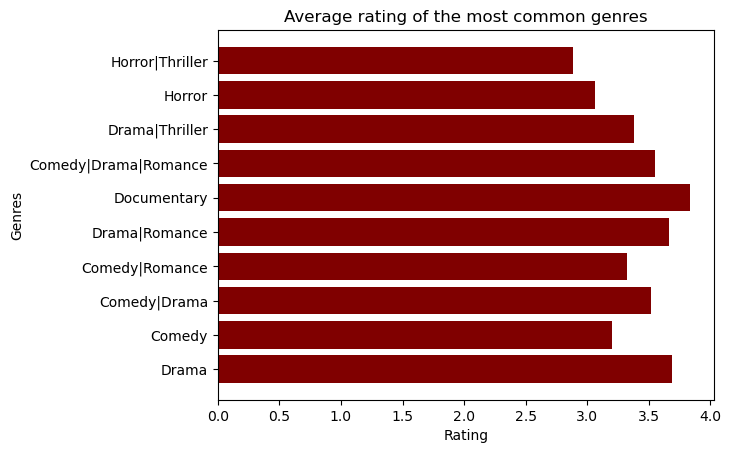

In [18]:

# group the movies by genre and find the average rating of the top ten most common genres
movies_grouped = merged_df.groupby(['genres'])['rating'].mean()

genre_rating = {}
for genre in genres:
    genre_rating[genre] = movies_grouped[genre]

# plot a bar plot of the average rating of genres
ratings = list(genre_rating.values())
plt.barh(genres, ratings, color= 'maroon')
plt.ylabel('Genres')
plt.xlabel('Rating')
plt.title('Average rating of the most common genres')
plt.show()

From the analysis done above, it is evident that these three genres; ___drama___, ___documentary___ and ___comedy___ are the most prevalent genre of movies and also the highest rated ones. These discovery is crucial in solving the cold-start problem in a recommendation system by recommending these genres to a new user. 

Next, I will analyze the ___rating_data___ dataframe to identify the top ten users who have rated the highest number of movies and determine the average rating of each of these users.

In [19]:
# create a list of top ten users who have rated the highest number of movies
users = list(rating_data['userId'].value_counts()[:10].index)
users

[414, 599, 474, 448, 274, 610, 68, 380, 606, 288]

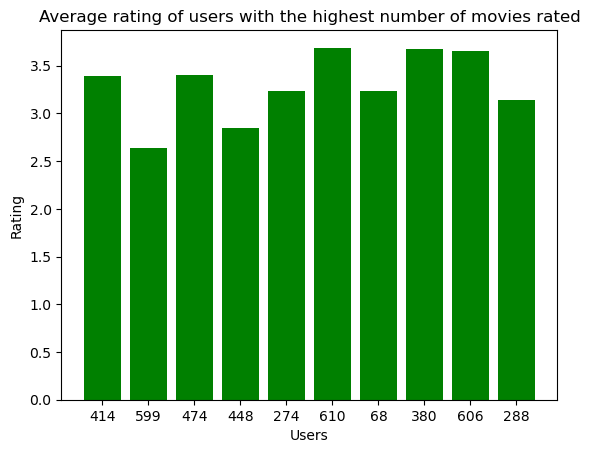

In [20]:
# group the ratings by userId and find the average rating of the top ten users who have rated the highest number of movies
ratings_grouped = rating_data.groupby(['userId'])['rating'].mean()

user_rating = {}
for user in users:
    user_rating[user] = ratings_grouped[user]

# plot a bar plot of the average rating of genres
users = [str(i) for i in users]
user_ratings = list(user_rating.values())
plt.bar(users, user_ratings, color= 'green')
plt.ylabel('Rating')
plt.xlabel('Users')
plt.title('Average rating of users with the highest number of movies rated')
plt.show()

These analysis steps have brought to light the discovery that movies within these dataset are  on average rated at 2.5 and 3.5 out of the possible 5. These discovery was first visualized by the barplot of average rating of the top the most common genre of movies and now confirmed by the barplot of the average rating of the top ten users with the highest number of movies rated.   

Finally, I analyse the ___rating_data___ data frame to determine the top ten highest rated movies that have been rated by atleast a hundred users.

In [21]:
# find movies that have been rated by atleast 100 users
movie_counts = rating_data['movieId'].value_counts()
rated_by_100 = movie_counts[movie_counts >= 100]

# groupby movieId and find the average ratings
mv_grouped = rating_data.groupby(['movieId'])['rating'].mean()

# loop over the rated_by_100 and determine the average rating of each movie
rating_rb100 = {}
for i in rated_by_100.index:
    rating_rb100[i] = mv_grouped[i]

sorted_100 = dict(sorted(rating_rb100.items(), key=lambda item:item[1], reverse=True))
top_10 = dict(list(sorted_100.items())[:10])
top_10

{318: 4.429022082018927,
 858: 4.2890625,
 2959: 4.272935779816514,
 1221: 4.25968992248062,
 48516: 4.252336448598131,
 1213: 4.25,
 912: 4.24,
 58559: 4.238255033557047,
 50: 4.237745098039215,
 1197: 4.232394366197183}

In [22]:
# extract the titles of the top 10 highest rated movies
ind_movies = pd.DataFrame(movie_data, index=movie_data['movieId'])
titles = {}
col = 'title'
for ind in top_10.keys():
    titles[ind] = ind_movies.at[ind, col]

titles

{318: 'I Love Trouble (1994)',
 858: 'Escape from New York (1981)',
 2959: 'Billy Elliot (2000)',
 1221: 'Soul Food (1997)',
 48516: nan,
 1213: 'Kiss Me, Guido (1997)',
 912: 'Wings of Desire (Himmel über Berlin, Der) (1987)',
 58559: nan,
 50: 'Georgia (1995)',
 1197: 'In the Company of Men (1997)'}

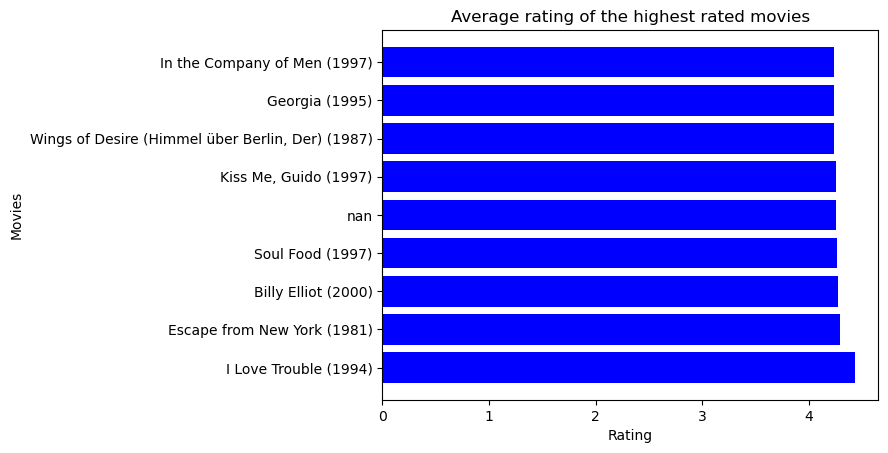

In [23]:
# plot a barplot of the top 10 highest rated movies
rated = list(top_10.values())
name = [str(i) for i in titles.values()]
plt.barh(name, rated, color= 'blue')
plt.ylabel('Movies')
plt.xlabel('Rating')
plt.title('Average rating of the highest rated movies')
plt.show()

The movies visualised above are the movies that can be recommended to new users who are yet to make any ratings of their own. Based on the rating they give to these movies, more recommendations will be made to them. 

***

### Modelling.

### Model 1.
The first model aims to give recommendations of movies simillar to a given movie. I will use the weighted avg of the ratings using cosine similarity as the weights. The movies which are more similar to the movie will have a higher weight in the rating computation for the movies.

In [24]:
# pivot our trainning dataset to create a sparse dataframe
sparse_ratings = rating_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
sparse_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Compute the cosine similarity matrix
cos_sim = cosine_similarity(sparse_ratings, sparse_ratings)
print(cos_sim.shape)
print(cos_sim)

(610, 610)
[[1.         0.02728287 0.05972026 ... 0.29109737 0.09357193 0.14532081]
 [0.02728287 1.         0.         ... 0.04621095 0.0275654  0.10242675]
 [0.05972026 0.         1.         ... 0.02112846 0.         0.03211875]
 ...
 [0.29109737 0.04621095 0.02112846 ... 1.         0.12199271 0.32205486]
 [0.09357193 0.0275654  0.         ... 0.12199271 1.         0.05322546]
 [0.14532081 0.10242675 0.03211875 ... 0.32205486 0.05322546 1.        ]]


In [26]:
# construct a data frame of similarity matrix
cos_sim_df = pd.DataFrame(cos_sim, index=sparse_ratings.index, columns=sparse_ratings.index)
cos_sim_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [27]:
# create a dataframe for mapping
indices = pd.Series(movie_data.index, index=movie_data['title'])

In [28]:
# function to get predictions
def simillar_movie_recommendations(movieId, cos_sim=cos_sim):
    if movieId in rating_data['movieId'].tolist():
        # Get the index of the movie that matches the title
        idx = indices[movieId]

        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = list(enumerate(cos_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = list(set([i[0] for i in sim_scores]))

        sim_movies = movie_data['title'].iloc[movie_indices]
    
        # Return the top 10 most similar movies
        return sim_movies
    else:
        return "Movie Id Not Found..."

In [29]:
# test the function using four differnt movieids
m_ids = [100, 100000, 249, 6000]

#loop over the list of movie ids
for id in m_ids:
    print('Movie Id:', id, 'Simillar Movies are:')
    print()
    print(simillar_movie_recommendations(id))
    print()

Movie Id: 100 Simillar Movies are:

452                 Rising Sun (1993)
390        Fear of a Black Hat (1994)
391                With Honors (1994)
456          Romeo Is Bleeding (1993)
44                  Pocahontas (1995)
590          Cold Comfort Farm (1995)
341                Bad Company (1995)
534    All Dogs Go to Heaven 2 (1996)
408              House Party 3 (1994)
156                   Net, The (1995)
Name: title, dtype: object

Movie Id: 100000 Simillar Movies are:

Movie Id Not Found...

Movie Id: 249 Simillar Movies are:

384                    Dazed and Confused (1993)
517                Great Day in Harlem, A (1994)
358                     Air Up There, The (1994)
263               Quick and the Dead, The (1995)
197       Dumb & Dumber (Dumb and Dumber) (1994)
395                             Firm, The (1993)
501                 Celluloid Closet, The (1995)
59     Lawnmower Man 2: Beyond Cyberspace (1996)
541                        Jack and Sarah (1995)
63               

### Model 2.
The second model is going to give movie recommendations to a specific user based on the movies, viewed and rated by that user. The user will be identified by their ___userId___.
We're going to find out how similar each user is to the input through the Pearson Correlation Coefficient. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below.

![Alt text](<Images/image-2.png>)

In [30]:
# create a function
def user_recommender(user):
    if user in rating_data['userId'].tolist():
        input_user = pd.DataFrame(rating_data[rating_data['userId']==user])
        #Filtering out the movies by movieId
        input_titles = merged_df[merged_df['movieId'].isin(input_user['movieId'].tolist())]
        #Then merging it so we can get the movieId. It's implicitly merging it by title.
        input_movies = pd.merge(input_user, input_titles)
        # drop the userId column
        input_movies.drop('userId', axis=1, inplace=True)
        # Filtering out users that have watched movies that the input has watched and storing it
        user_sim = rating_data[rating_data['movieId'].isin(input_movies['movieId'].tolist())]
        #Groupby userId
        user_sim_grouped = user_sim.groupby(['userId'])
        #Sorting it so users with movie most in common with the input will have priority
        user_sim_grouped = sorted(user_sim_grouped,  key=lambda x: len(x[1]), reverse=True)
        # select the top 50 most simillar users
        user_sim_grouped = user_sim_grouped[0:50]

        #Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
        pear_cor_dict = {}

        #For every user group in our subset
        for name, group in user_sim_grouped:
            #sort the input and current user group
            group = group.sort_values(by='movieId')
            input_movies = input_movies.sort_values(by='movieId')
            
            n_ratings = len(group)
            #movies that they both have in common
            temp = input_movies[input_movies['movieId'].isin(group['movieId'].tolist())]
            # store the ratings to facilitate future calculations
            rating_list = temp['rating'].tolist()
            # put the current user group reviews in a list format
            group_list = group['rating'].tolist()
            # calculate the pearson correlation between two users
            Sxx = sum([i**2 for i in rating_list]) - pow(sum(rating_list),2)/float(n_ratings)
            Syy = sum([i**2 for i in group_list]) - pow(sum(group_list),2)/float(n_ratings)
            Sxy = sum( i*j for i, j in zip(rating_list, group_list)) - sum(rating_list)*sum(group_list)/float(n_ratings)
    
            #If the denominator is different than zero, then divide, else, 0 correlation.
            if Sxx != 0 and Syy != 0:
                pear_cor_dict[name] = Sxy/np.sqrt(Sxx*Syy)
            else:
                pear_cor_dict[name] = 0
        # create a dataframe
        pear_df = pd.DataFrame.from_dict(pear_cor_dict, orient='index')
        pear_df.columns = ['similarityIndex']
        pear_df['userId'] = pear_df.index
        pear_df.index = range(len(pear_df))
        # get the top 25 most similar users
        sim_users = pear_df.sort_values(by='similarityIndex', ascending=False)[0:25]
        sim_users_rating = pd.concat([sim_users,rating_data], axis=1, join='inner')
        #Multiply the similarity by the user's ratings
        sim_users_rating['weightedRating'] = sim_users_rating['similarityIndex']*sim_users_rating['rating']
        #Apply a sum to the topUsers after grouping it up by userId
        temp_users_rating = sim_users_rating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
        temp_users_rating.columns = ['sum_similarityIndex','sum_weightedRating']
        #Create an empty dataframe
        recom_df = pd.DataFrame()
        #Now we take the weighted average
        recom_df['weighted average recommendation score'] = temp_users_rating['sum_weightedRating']/temp_users_rating['sum_similarityIndex']
        recom_df['movieId'] = temp_users_rating.index
        recom_df = recom_df.sort_values(by='weighted average recommendation score', ascending=False)
        recom_movies = movie_data.loc[movie_data['movieId'].isin(recom_df.head()['movieId'].tolist())]
        return recom_movies
    else:
        return "UserId Not Found.."

In [55]:
# test the function using four differnt movieids
u_ids = [10, 100000, 249, 6000]

#loop over the list of movie ids
for id in u_ids:
    print('User Id:', id, 'Recommended Movies are:')
    print()
    print(user_recommender(id))
    print()

User Id: 10 Recommended Movies are:

     movieId                                 title                    genres
43        47           Seven (a.k.a. Se7en) (1995)          Mystery|Thriller
130      157                 Canadian Bacon (1995)                Comedy|War
136      163                      Desperado (1995)    Action|Romance|Western
184      216                  Billy Madison (1995)                    Comedy
720      940  Adventures of Robin Hood, The (1938)  Action|Adventure|Romance

User Id: 100000 Recommended Movies are:

UserId Not Found..

User Id: 249 Recommended Movies are:

     movieId                                title                genres
43        47          Seven (a.k.a. Se7en) (1995)      Mystery|Thriller
461      527              Schindler's List (1993)             Drama|War
485      553                     Tombstone (1993)  Action|Drama|Western
705      923                  Citizen Kane (1941)         Drama|Mystery
734      954  Mr. Smith Goes to Washingto

***

### Model Evaluation.
Now I am going to evaluate the perfomance othe two models using ___RMSE___.

In [32]:
# Calculate the Pearson correlation between items (columns)
correlation = sparse_ratings.corr(method='pearson')

# Function to predict ratings using item-item collaborative filtering
def predict_ratings(user_id, movie_id):
    # Find items similar to the target item
    similar_items = correlation[movie_id].dropna()
    similar_items = similar_items[similar_items.index != movie_id]

    # Get user ratings for the target user
    user_ratings = sparse_ratings.loc[user_id, similar_items.index]

    # Calculate the predicted rating using weighted average
    if user_ratings.empty:
        return np.nan
    else:
        weighted_sum = np.sum(user_ratings * similar_items)
        sum_of_weights = np.sum(np.abs(similar_items))
        predicted_rating = weighted_sum / sum_of_weights
        return predicted_rating

# Function to evaluate the recommender system using RMSE
def evaluate_model(df):
    predictions = []
    actual_ratings = []

    for _, row in df.iterrows():
        user_id = row['userId']
        item_id = row['movieId']
        actual_rating = row['rating']

        # Predict the rating
        predicted_rating = predict_ratings(user_id, item_id)

        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actual_ratings.append(actual_rating)

    rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
    mae = mean_absolute_error(actual_ratings, predictions)
    return rmse, mae


In [33]:
# Evaluate the recommender system
rmse, mae = evaluate_model(rating_data)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 3.20
MAE: 2.96


The model has an ___Root Mean Squared Error___ of ___3.2___ and a ___Mean Absolute Error___ of ___2.96.___

***

### Conclusions.
* Through the use of content based filtering, I was able to come up with a model that recommends ten movies to users that are simillar to a particular movie that a user chooses. These model is useful in recommending movies to users who are yet to make their prefrences known but are interested in specific movies and would like recommendations of simillar movies.

* In the second model, by using collaborative filtering, I was able to come up with a model that recommends five movies to a user based on the ratings that he/she has given other movies. These was the main objective of these project and it has been achieved with ___RMSE___ and ___MAE___ as the  evaluation metrics.

* The Exploratory Data Analysis revealed some useful trends pertaining to how people rate movies. Most of the users give a rating of between 2.5 and 3.5 to movies leading to an average of around the rating for very popular movies.  

### Recommendations.
* Based on the ___RMSE___ and ___MAE___ values obtained, the next step I can recommend with regards to building a better recommendation system, is to broaden the scope of analysis. A deeper dive beyond the rating of the movies is neccesary in order to better understand the preferences of individual users. 